# Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp

# Plot Returns

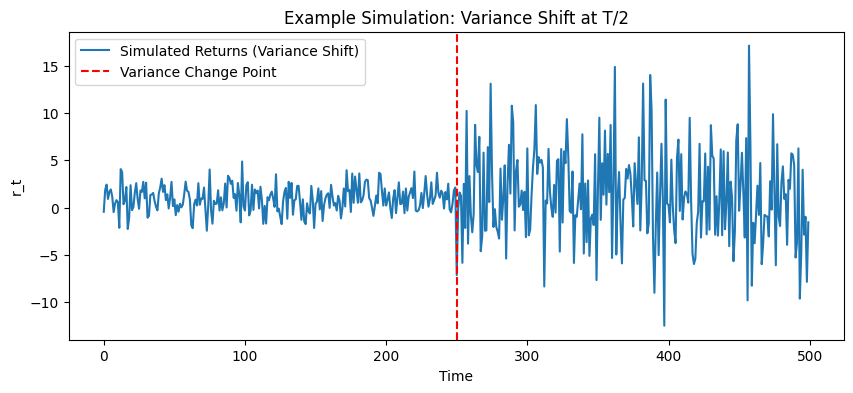

In [32]:
# Function to simulate r_t with variance shift
def simulate_rt(T):
    sigma = np.array([np.sqrt(2) if t < T/2 else np.sqrt(25) for t in range(T)])
    rt = 1 + sigma * np.random.randn(T)  # rt ~ N(1, sigma_t^2)
    return rt

T_plot = 500
rt_example = simulate_rt(T_plot)

plt.figure(figsize=(10, 4))
plt.plot(rt_example, label="Simulated Returns (Variance Shift)")
plt.axvline(T_plot/2, color='red', linestyle='--', label="Variance Change Point")
plt.title("Example Simulation: Variance Shift at T/2")
plt.xlabel("Time")
plt.ylabel("r_t")
plt.legend()
plt.show()

The first half of the series is less volatile (σ²=2), and after T/2 variance jumps to σ²=8, creating visible change in fluctuation magnitude.

# Monte Carlo

In [33]:
def monte_carlo_test(T, N=1000, alpha=0.05):
    rejections = 0
    for _ in range(N):
        rt = simulate_rt(T)
        t_stat, p_val = ttest_1samp(rt, popmean=1)  # two-sided test
        if p_val < alpha:
            rejections += 1
    return rejections / N  # empirical size

# Run for T = 250, 500, 1000
T_values = [250, 500, 1000]
results = {T: monte_carlo_test(T) for T in T_values}

print("Empirical Size (Type I Error when ignoring variance shift):")
for T, size in results.items():
    print(f"T = {T}: {size:.3f}")


Empirical Size (Type I Error when ignoring variance shift):
T = 250: 0.041
T = 500: 0.049
T = 1000: 0.050


The empirical Type I error is very close to the nominal 5% across all sample sizes (T = 250, 500, 1000).

This indicates that the standard t-test, even when ignoring the heteroskedasticity, performs reasonably well in controlling the size. Slight deviations for smaller T (e.g., T=250) are expected due to sampling variability.